In [1]:
import sklearn
from sklearn import datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Support Vector Machines and Kernels
Consider using a Support Vector Machine binary classifier in practice with an RBF kernel,
such as the `SVC' implementation in sklearn.
For example, you could construct such a classifier as follows:

    my_svm = svm.SVC(kernel='rbf', gamma=1.0, C=1.0)

Throughout #1, you can assume a binary classification task with 𝑁 training examples, each
with feature vector of size 𝐹 . Each feature is a numerical real value, and each feature has
been separately normalized so the training set mean is 0 and variance is 1. You can guarantee
that the maximum absolute value of any feature is at most 5

In [2]:
X, Y = datasets.make_classification(n_samples=1000, n_features=30)
X.shape, Y.shape,

((1000, 30), (1000,))

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, stratify=Y)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 30), (200, 30), (800,), (200,))

In [4]:
classifier = svm.SVC(gamma= 1/X.shape[1], C=10/X.shape[1])
classifier.fit(X_train, Y_train)
classifier.score(X_train, Y_train),classifier.score(X_test, Y_test),

(0.96125, 0.945)

In [5]:
classifier = svm.SVC(gamma= 3/X.shape[1], C=30/X.shape[1])
classifier.fit(X_train, Y_train)
classifier.score(X_train, Y_train),classifier.score(X_test, Y_test),

(0.99875, 0.93)

In [6]:
classifier = svm.SVC(gamma= 1/(2*X.shape[1]), C=10/(2*X.shape[1]))
classifier.fit(X_train, Y_train)
classifier.score(X_train, Y_train),classifier.score(X_test, Y_test),

(0.93875, 0.94)

### 1a. Describe a setting of the hyperparameters gamma and C that is sure to overfit to any typical training set and achieve zero training error.
Value of parameter setting gamma and C below mentione can lead to overfit data.

**Gamma :** Value of parameter gamme with value (1/number_of_features) is generally give best result for RBF kernels. Any value of gamma greater than this results in model overfit to training data and giving 100 accuracy on it.

**C :** Value of parameter 10* (1/number_of_features) is generally gives best result for RBF kernel. Any value greater than that generally overfits the data.

In short value of gamma greater than (1/number_of_features) and parameter C greater than 10* (1/number_of_features) surely overfits model and give 100% accuracy.

### 1b. Describe a setting of the hyperparameters gamma and C that is sure to overfit to any typical training set and achieve zero training error.
Value of parameter setting gamma and C below mentione can lead to overfit data.

**Gamma :** Value of parameter gamme with value 1/number_of_features is generally give best result for RBF kernels. Any value of gamma less than this results in model underfits to training data and giving poor accuracy on it.

**C :** Value of parameter 10* (1/number_of_features) is generally gives bets result for RBF kernel. Any value less than that generally underfits the data.

In short value of gamme less than 1/number_of_features and parameter C less than 10* (1/number_of_features) surely underfits model and give quite poor accuracy.

### 1c. If you were performing grid search to find the SVM that generalized best to unseen data, what range of values for gamma, C would you recommend? Specify your answer with two lines of NumPy code (e.g. using a list like [1, 2, 3] or np.linspace or np.logspace). Also provide 1-2 sentences of justification. Assume that you can't afford more than 5 distinct values for each variable.

**opt_C = 10/X.shape[1]**

**C = np.linspace( opt_C - (opt_C/2), opt_C + (opt_C/2), num=5)**

**opt_gamma = 1/X.shape[1]**

**gamma = np.linspace( opt_gamma - (opt_gamma/2), opt_gamma + (opt_gamma/2), num=5)**

In [7]:
opt_C = 10/X.shape[1]
C = np.linspace( opt_C - (opt_C/2), opt_C + (opt_C/2), num=5)
opt_gamma = 1/X.shape[1]
gamma = np.linspace( opt_gamma - (opt_gamma/2), opt_gamma + (opt_gamma/2), num=5)
print('Gamma : ',gamma)
print('C : ', C)

Gamma :  [0.01666667 0.025      0.03333333 0.04166667 0.05      ]
C :  [0.16666667 0.25       0.33333333 0.41666667 0.5       ]


In [8]:
param_grid = {'C': C, 'gamma': gamma}
grid_svc = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=2, verbose=1)
grid_svc.fit(X, Y)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.1s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.16667, 0.25   , 0.33333, 0.41667, 0.5    ]), 'gamma': array([0.01667, 0.025  , 0.03333, 0.04167, 0.05   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [9]:
print(grid_svc.best_score_)

0.933


In [10]:
print(grid_svc.best_params_)

{'C': 0.5, 'gamma': 0.016666666666666666}


In [11]:
cv_results = pd.DataFrame(grid_svc.cv_results_)
cv_results[['param_C','param_gamma','mean_train_score','mean_test_score']]

,param_C,param_gamma,mean_train_score,mean_test_score
0,0.166667,0.0166667,0.936,0.925
1,0.166667,0.025,0.939,0.919
2,0.166667,0.0333333,0.941,0.914
3,0.166667,0.0416667,0.940,0.907
4,0.166667,0.05,0.941,0.901
5,0.25,0.0166667,0.951,0.928
6,0.25,0.025,0.953,0.926
7,0.25,0.0333333,0.955,0.924
8,0.25,0.0416667,0.960,0.917
9,0.25,0.05,0.964,0.909


### 1d: Answer the following True/False questions, providing one sentence of explanation for each one
* 1d(i): When used for binary classification, Support Vector Machines (SVMs) provide an estimate of the probability that a given feature vector 𝑥 𝑖 will have a positive label: **False. Default implementation of SVC in scikit-learn does not provides this probability. We need to set parameter probability to True when creating classifier. This for each sample model will output 2 probabilities. Probability of sample being positive and probability of it being negative.**
* 1d(ii): An advantage of an SVM is that the optimal weight vector 𝑤 (a vector with one entry per feature) will typically be sparse : **False.**
* 1d(iii): When choosing a kernel function 𝑘 , it should be the case that for any finite dataset of 𝑁 distinct examples, the 𝑁 ×𝑁 kernel matrix is invertible: **True. Because when using SVC, many times it happens that data is not clearly seprable in current feature space using hyperplanes. In this kind of scenarios, we transform data into new feature space (using kernel specified like RBF) where classifier can easily classify data. We need this kernel to be invertible to be able to get original feature space back by inverting it.We can inverse this transformation to get original feature space.**

## 2: Random Forests with/without Bootstrap Aggregating(BAgging)
Consider the RandomForestClassifier and implemented in sklearn as described in the link: https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

There are four key hyperparameters (using the sklearn notation):
* n_estimators : Number of separate trees to estimate
* max_features : Number of features to use at each split
* min_samples_leaf : Number of samples to use at each leaf
* bootstrap : boolean indicator of whether to perform BAgging or not

Below, you can assume a binary classification task with 𝑁 training examples, each with
feature vector of size 𝐹 .

In [12]:
random_forest_classifier = RandomForestClassifier(bootstrap=False, max_features=2)
random_forest_classifier.fit(X_train, Y_train)
random_forest_classifier.score(X_train, Y_train),random_forest_classifier.score(X_test, Y_test)

(1.0, 0.95)

In [13]:
random_forest_classifier.n_estimators,random_forest_classifier.max_depth, random_forest_classifier.min_samples_leaf

(10, None, 1)

### 2a: Describe a setting of the hyperparameters n_estimators, max_features,and min_samples_leaf that is sure to overfit to any typical training set. You can assume no BAgging (bootstrap=False).

Below are setting of parameters n_estimators, max_features and min_samples_leaf which always overfit training data.

* **n_estimators :** Any value of n_estimator > sqrt(num_of_features) will result in overfitting of training data.
* **max_features :** Any value of max_features > sqrt(num_of_features) will result in overfitting of training data.
* **min_samples_leaf :** Any value of min_samples_leaf quite less than (num_of_training_samples/num_of_classes) will surely result in overfitting of training data.

### 2b: Describe a setting of the hyperparameters n_estimators, max_features,and min_samples_leaf that is sure to underfit to any typical training set. You can assume no BAgging (bootstrap=False).

Below are setting of parameters n_estimators, max_features and min_samples_leaf which always underfit training data.

* **n_estimators :** Any value of n_estimator quite less than sqrt(num_of_features) will result in underfitting of training data.
* **max_features :** Any value of n_estimator < sqrt(num_of_features) will result in underfitting of training data. 
* **min_samples_leaf :** Any value of min_samples_leaf > (num_of_training_samples/num_of_classes) will surely result in underfitting of training data.

In [14]:
random_forest_classifier = RandomForestClassifier(bootstrap=False, \
                                                  max_features=int(np.sqrt(X.shape[1])),\
                                                  n_estimators=int(np.sqrt(X.shape[0])),min_samples_leaf=0.5)
random_forest_classifier.fit(X_train, Y_train)
random_forest_classifier.score(X_train, Y_train),random_forest_classifier.score(X_test, Y_test)

(0.7625, 0.76)

In [15]:
random_forest_classifier = RandomForestClassifier(bootstrap=False, \
                                                  max_features=int(np.sqrt(X.shape[1]))+1,\
                                                  n_estimators=int(np.sqrt(X.shape[0]))+10,min_samples_leaf=1)
random_forest_classifier.fit(X_train, Y_train)
random_forest_classifier.score(X_train, Y_train),random_forest_classifier.score(X_test, Y_test)

(1.0, 0.975)

In [16]:
random_forest_classifier = RandomForestClassifier(bootstrap=False, \
                                                  max_features=int(np.sqrt(X.shape[1]))-2,\
                                                  n_estimators=int(np.sqrt(X.shape[0]))-20,min_samples_leaf=0.5)
random_forest_classifier.fit(X_train, Y_train)
random_forest_classifier.score(X_train, Y_train),random_forest_classifier.score(X_test, Y_test)

(0.9425, 0.97)

### 2c: If you were performing grid search to find the RandomForest that generalized best to unseen data, what range of values for n_estimators, max_features, and min_samples_leaf would you recommend? Should we set bootstrap to True or False? Specify your answer with a few lines of NumPy code (e.g. using a list like [1, 2, 3] or np.linspace or np.logspace to set each variable). Include a sentence or two of justification. Assume that you can't afford more than 5 distinct values for each variable.

When **n_estimators** and **max_features** are set to **square root of number of features**, they gives quite good results almost every other time. We'll be trying values around this values to get good results. **min_samples_leaf** is generally set to **(number_of_samples/ number_of_class)** to get good results. We'll try few other values around it to optimize model. It's generally good idea to set bootstrap = True as it'll try different samples fetching it randomly from dataset and fitting model which will results in well generalized model. We'll be setting both values **(True,False)** for bootstrap.

**square_root = np.sqrt(X.shape[1])**

**n_estimators_grid = np.linspace( square_root - (square_root/2),square_root + (square_root/2),num=5,dtype=np.int32)**

**max_features_grid = np.linspace( square_root - (square_root/2),square_root + (square_root/2),num=5,dtype=np.int32)**

**samples_per_class = X.shape[0] / len(np.unique(Y))**

**min_samples_leaf_grid = np.linspace(samples_per_class-(samples_per_class/2), samples_per_class+(samples_per_class/2), num=5, dtype=np.int32)**

**bootstrap_grid = [True, False]**

In [17]:
square_root_sample = np.sqrt(X.shape[0])
n_estimators = np.linspace( square_root_sample - (square_root_sample/2),square_root_sample + (square_root_sample/2),num=5,dtype=np.int32)
square_root_feature = np.sqrt(X.shape[1])
max_features = np.linspace( square_root_feature - (square_root_feature/2),square_root_feature + (square_root_feature/2),num=5,dtype=np.int32)
#samples_per_class = X.shape[0] / len(np.unique(Y))
#min_samples_leaf = np.linspace(samples_per_class-(samples_per_class/2), samples_per_class+(samples_per_class/2), num=5, dtype=np.int32)
min_samples_leaf = [0.2,0.3,0.4,0.5,1]
print('N Estimators : ',n_estimators)
print('Max Features : ',max_features)
print('Min Samples Leaf',min_samples_leaf)

N Estimators :  [15 23 31 39 47]
Max Features :  [2 4 5 6 8]
Min Samples Leaf [0.2, 0.3, 0.4, 0.5, 1]


In [18]:
param_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'min_samples_leaf': min_samples_leaf, 'bootstrap':[True,False]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=2, verbose=1)
grid_rf.fit(X, Y)

Fitting 2 folds for each of 250 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   23.4s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([15, 23, 31, 39, 47], dtype=int32), 'max_features': array([2, 4, 5, 6, 8], dtype=int32), 'min_samples_leaf': [0.2, 0.3, 0.4, 0.5, 1], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [19]:
print(grid_rf.best_score_)

0.966


In [20]:
print(grid_rf.best_params_)

{'bootstrap': False, 'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 31}


In [21]:
cv_results = pd.DataFrame(grid_rf.cv_results_)
cv_results[['param_n_estimators','param_max_features', 'param_bootstrap','param_min_samples_leaf','mean_train_score','mean_test_score']]

,param_n_estimators,param_max_features,param_bootstrap,param_min_samples_leaf,mean_train_score,mean_test_score
0,15,2,True,0.2,0.753,0.703
1,23,2,True,0.2,0.817,0.787
2,31,2,True,0.2,0.944,0.944
3,39,2,True,0.2,0.864,0.836
4,47,2,True,0.2,0.915,0.922
5,15,2,True,0.3,0.650,0.635
6,23,2,True,0.3,0.783,0.786
7,31,2,True,0.3,0.854,0.840
8,39,2,True,0.3,0.797,0.766
9,47,2,True,0.3,0.862,0.848


### 2d: Answer the following True/False questions, providing one sentence of explanation for each one:
* 2d(i): When used for binary classification, RandomForests (RFs) can provide an estimate of the probability that a given feature vector 𝑥 𝑖 will have a positive label: **True. RandomForestClassifier in scikit-learn provides `predict_proba()` which can return probability of results.It has 2 probabilities for each sample. Probability of result being positive and probabilitiy of result being negative.**
* 2d(ii): With bootstrap aggregating enabled, random forests will almost always severely overfit the training data if the number of trees used (e.g. the n_estimators) is very large (say, over 500): **False. It depends on number of features present in dataset. If n_estimators is larger than number of features in dataset then it'll surely overfit data.**
* 2d(iii): When fitting random forests, it is generally a good idea to allow each node of each tree to consider as many features as possible (e.g. max_features should be large) : **False. It'll result in overfitting of training data and will not generalize well.**
* 2d(iv): Random forests only use randomness when creating many similar datasets via BAgging. No other step of the algorithm uses randomness : **False. Random forest uses random subset of features from all features at each possible split during learning process.**

In [22]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, Y_train)
random_forest_classifier.score(X_train, Y_train),random_forest_classifier.score(X_test, Y_test)

(0.99375, 0.965)

### 3: ROC Curves Again
ROC curves are commonly used in binary classifiers that produce probabilities. Here's a quick summary:

Given any dataset's true binary labels and the model's predicted probabilities
for each example , we can draw a ROC curve to characterize the performance of
the model at all possible decision thresholds. Each point on the ROC curve gives the TPR
(true positive rate) and FPR (false positive rate) at one specific threshold 𝜏τ used to create
binary predictions at each example 𝑖 :
* 3a: Can we apply ROC curves to binary classifiers that cannot easily produce probabilities but produce some real-valued scores for each example? How would we select the range of thresholds to evaluate? : **Yes, We can apply ROC Curves to binary classifiers that can not produce probabilities. We can start with some initial guess by analysing some positive/negative samples. We then move in both direction of that initial guess of threshold and try various thresholds (say for example if we guessed initial threshold as 5 then we should try threshold values like [1, 3, 5, 7, 9]). We can try different parameters and find out TPR and FPR for various threshold values and then plot TPR vs FPR(ROC). After plotting ROC curve, we select setting of threshold where plot of TPR vs FPR sits quite above TPR=FPR line and covers much of area of graph. More the area it cover better the accuracy. Ideally we should select threshold with maximal sum of True Positives and False Negatives**
* 3b: Suppose you fit a classifier to data, and you observe a TPR of 0.3 and an FPR of 0.7. Your friend says that this is worse than a random classifier (if plotted on an ROC curve, would fall below the TPR=FPR diagonal line), and so you should throw this result away. Is there anything better you can do? Describe how to transform the predicted binary labels to reach better performance. What TPR and FPR would you expect to achieve? : **Yes. TPR of 0.3 and FPR of 0.7 will result on ROC curve below TPR=FPR diagonal line. If it falls above that line than it's better decision results. This will result in quite less accuracy of around 20-30% which is quite less than average 50%. We need to work towards increasing TPR and decreasing FPR. Currently our model is predicting most True as False and most False as True. One way to achieve best result with TPR - 0.3 and FPR - 0.7 is to flip results of current prediction. It means we need to predict False as True and True as False. This way model will perform best as now it'll be above TPR=FPR line. It's like you took mirror image of TPR-0.3 & FPR-0.7 based on line TPR=FPR.**

In [23]:
cross_val_score(svm.SVC(), X, Y, scoring="roc_auc",cv=5)

array([0.98336634, 0.98148515, 0.9876    , 0.98313131, 0.97454545])

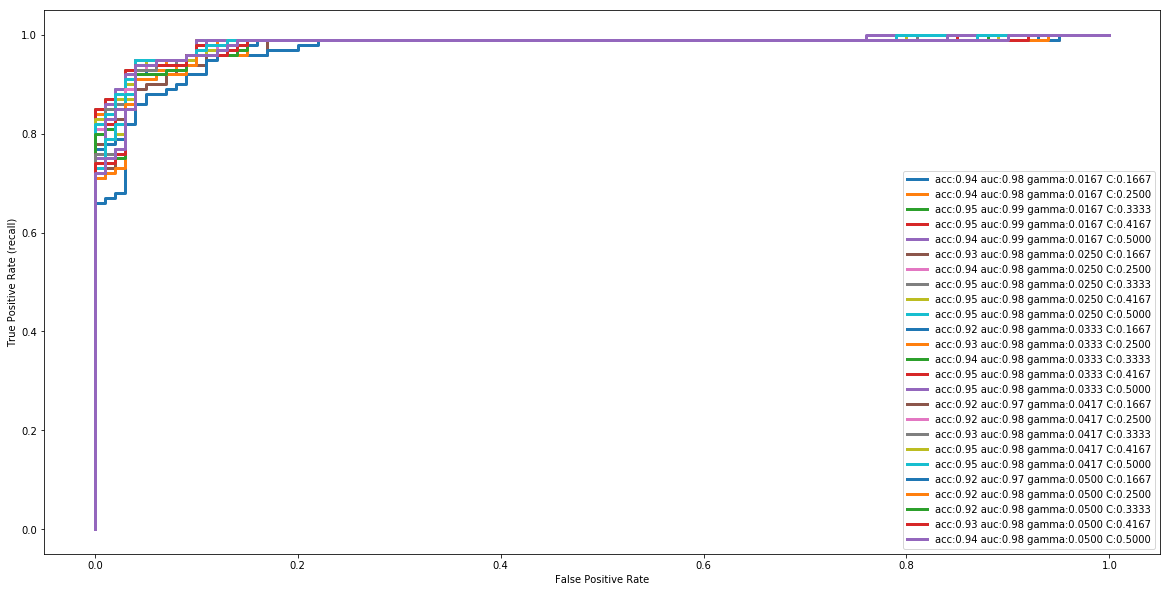

In [24]:
plt.figure(figsize=(20,10))
for g in gamma:
    for c in C:
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate (recall)")
        svc = svm.SVC(gamma=g, C=c, kernel='rbf').fit(X_train, Y_train)
        decision_function = svc.decision_function(X_test)
        fpr, tpr, _ = roc_curve(Y_test, decision_function)
        acc = svc.score(X_test, Y_test)
        auc = roc_auc_score(Y_test, svc.decision_function(X_test))
        plt.plot(fpr, tpr, label="acc:%.2f auc:%.2f gamma:%.4f C:%.4f" % (acc, auc,g,c), linewidth=3)
plt.legend(loc="best");

In [25]:
#random_forest_classifier.predict_proba(X)